In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.tree import plot_tree

In [4]:
plt.rcParams['figure.figsize'] = [7, 7]
sns.set(style='darkgrid')
plt.rcParams['scatter.edgecolors'] = 'black'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.set_option('display.unicode.east_asian_width', True)

In [5]:
iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data,
        columns=iris_dataset.feature_names)
labels = iris_dataset.target_names
iris.info()
print(iris.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [6]:
label = iris_dataset.target
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
scaler = StandardScaler()
iris = scaler.fit_transform(iris)
Features = pd.DataFrame(iris, columns=['SL', 'SW', 'PL', 'PW'])
print(Features.shape)

(150, 4)


In [ ]:
for i in range(1,1000):
  X_train, X_test, Y_train, Y_test = train_test_split(
    Features, label, test_size=0.2, random_state=i)
  iris_Tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.008, random_state=2)
  iris_Tree.fit(X_train, Y_train)
  iris_Forest = BaggingClassifier(iris_Tree, n_estimators=200,
                                  max_samples=0.8, random_state=868)
  iris_Forest.fit(X_train, Y_train)
  train_score = iris_Forest.score(X_train, Y_train)
  test_score = iris_Forest.score(X_test, Y_test)
  if test_score >= train_score:
    print('test: {}, train: {} random_state: {}'.format(test_score, train_score, i))

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(
    Features, label, test_size=0.2, random_state=200)
iris_Tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.008, random_state=2)
iris_Tree.fit(X_train, Y_train)
iris_Forest = BaggingClassifier(iris_Tree, n_estimators=200,
                                  max_samples=0.8, random_state=868)
iris_Forest.fit(X_train, Y_train)
train_score = iris_Forest.score(X_train, Y_train)
test_score = iris_Forest.score(X_test, Y_test)
print('test: {}, train: {}'.format(test_score, train_score))

test: 1.0, train: 1.0


In [10]:
print(len(iris_Forest.estimators_))

200


[Text(0.375, 0.9, 'PL <= -0.63\nentropy = 1.583\nsamples = 67\nvalue = [30, 32, 34]\nclass = virsinica'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 23\nvalue = [30, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'PL <= 0.678\nentropy = 0.999\nsamples = 44\nvalue = [0, 32, 34]\nclass = virsinica'),
 Text(0.25, 0.5, 'SL <= -0.961\nentropy = 0.201\nsamples = 21\nvalue = [0, 31, 1]\nclass = versicolor'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virsinica'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 20\nvalue = [0, 31, 0]\nclass = versicolor'),
 Text(0.75, 0.5, 'PW <= 0.659\nentropy = 0.191\nsamples = 23\nvalue = [0, 1, 33]\nclass = virsinica'),
 Text(0.625, 0.3, 'PW <= 0.462\nentropy = 0.722\nsamples = 3\nvalue = [0, 1, 4]\nclass = virsinica'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 4]\nclass = virsinica'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 20\

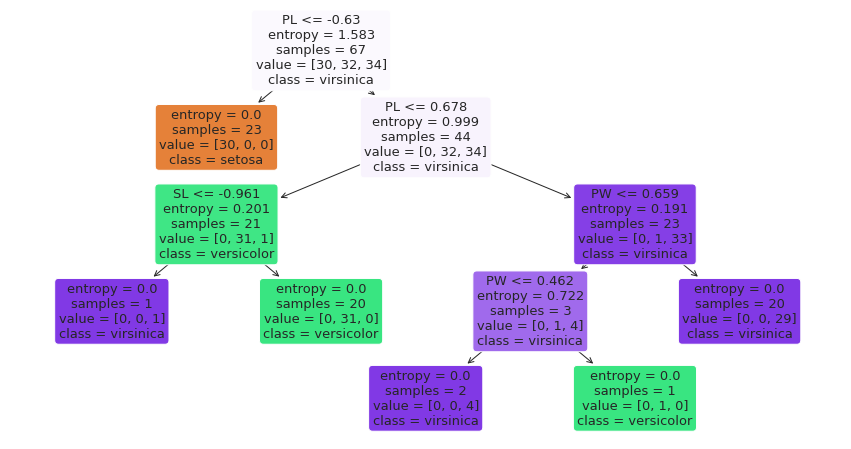

In [15]:
plt.figure(figsize=(15,8))
tree.plot_tree(iris_Forest.estimators_[3], filled=True, rounded=True, class_names=['setosa','versicolor', 'virsinica'],
               feature_names = Features.columns)

In [17]:
for i in range(len(iris_Forest.estimators_)):
  print(tree.export_text(iris_Forest.estimators_[i]))

|--- feature_3 <= -0.59
|   |--- class: 0
|--- feature_3 >  -0.59
|   |--- feature_2 <= 0.62
|   |   |--- class: 1
|   |--- feature_2 >  0.62
|   |   |--- feature_3 <= 0.72
|   |   |   |--- feature_0 <= 1.34
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.34
|   |   |   |   |--- class: 2
|   |   |--- feature_3 >  0.72
|   |   |   |--- class: 2

|--- feature_2 <= -0.72
|   |--- class: 0
|--- feature_2 >  -0.72
|   |--- feature_2 <= 0.68
|   |   |--- feature_3 <= 0.66
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.66
|   |   |   |--- class: 2
|   |--- feature_2 >  0.68
|   |   |--- class: 2

|--- feature_2 <= -0.54
|   |--- class: 0
|--- feature_2 >  -0.54
|   |--- feature_3 <= 0.72
|   |   |--- feature_2 <= 0.73
|   |   |   |--- feature_0 <= -0.78
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  -0.78
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.73
|   |   |   |--- class: 2
|   |--- feature_3 >  0.72
|   |   |--- class: 2

|--- feature_2 <= -